<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

# CAPSTONE PROJECT GP 1014 : INSAID TELECOM

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
-  3.1 [**Installing Libraries**](#Section31)<br>
-  3.2 [**Upgrading Libraries**](#Section32)<br>
-  3.3 [**Importing Libraries**](#Section33)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>

### **Working on Individual Files**

- **5A.** [**Data Pre-Profiling ("events")**](#Section5)<br>
- **6A.** [**Data Pre-Processing ("events")**](#Section6)<br>
- **7A.** [**Post- Profiling (events_no_dup)**](#Section7)<br>
- **5B.** [**Data Pre-Profiling ("gender")**](#Section8)<br>
- **6B.** [**Data Pre-Processing ("gender")**](#Section9)<br>
- **7B.** [**Post- Profiling (gender_s)**](#Section10)<br>
- **5C** [**Data Pre-Profiling ("phone")**](#Section11)<br>
- **6C** [**Data Pre-Processing ("phone")**](#Section12)<br>
- **7C** [**Post- Profiling (phone)**](#Section13)<br>

**5** [**Merging & Pre-Profiling**](#Section14)<br>
**6** [**Pre-Processing**](#Section15)<br>
**7** [**Post-Profiling**](#Section16)<br>

**8** [**Exploratory Data Analysis**](#Section17)<br>

**8A** [**Distribution of Users (device_id) Across Target States**](#Section18)<br>
**8B** [**Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).**](#Section19)<br>
**8C** [**Distribution of Users across Gender**](#Section20)<br>
**8D** [**Distribution of Users across Age Segments**](#Section21)<br>
**8E** [**Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender**](#Section22)<br>
**8F** [**Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands)**](#Section23)<br>
**8G** [**Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands)**](#Section24)<br>
**8H** [**Hourly distribution of Phone Calls**](#Section25)<br>
**9** [**Summarization**](#Section26)<br>
**10** [**Conclusion**](#Section27)</br>
**11** [**Insights**](#Section28)</br>



<a name = Section1></a>
# **1. Introduction**

### Insaid Telecom is major Telecom service provider based out of Gurugram. It needed some data driven 

### insights for its product design and marketing team that could increase its customer base and revenues. 

### Hence the insights provided must act as an enabler for its business decision making processes.

### as it looks forward to expand its customer base in the states of West Bengal, Karnataka, Kerala, Gujarat, 

### Bihar & Punjab.

###  The Telcom company has been able to provide a data set comprising of three CSV files for the Capstone_1014 group to draw inferences from.

### The event.csv is the master file while the gender.csv & mobile.csv contain demographic and mobile 

### specific data respectively. 

### The three data sets are linked together by customer specific device_ids, which the company has

### anonymised deeming it to be a propriety information  order to protect the privacy rights of its customers.

<a name = Section2></a>
# **2. Problem Statement**


### INSAID Telecom:  West Bengal, Karnataka, Kerala, Gujarat, Bihar & Punjab
- ** Problem Statement:**

  - In the past few years, the Telecom space has seen intense competion. The customer churn is observed along with a rise in customer expectation and the demand for better service at a lesser tarrif.
  
   -  Most value added services are now being extended to the customers via the medium of the mobile.

  - Customers buying a new mobile phone and telecom service package looks for assurity of their money to be worthy.

  - They are increasingly demanding more capabilities at an affordable rate from their mobiles.

  - There is a need for a method to study predict the customer behaviour that determines the mobile usage pattern and the to effectively determine the need for the type of service extended.

  - Even though Insaid Teleom uses internal methodologies based upon managerial instinct to predict the user demand and product service rollout, this the design of the service and their prediction method may not be the best.

  - Besides, the product offering, the marketing effort may not be contributing to the revenue generation effort.

  - It is important to know the impact of these demographic influences to tailor a suitable product.
  
- <p align="center"><img src="/Users/bsnijjar/Downloads/INSAID-removebg-preview-2.png"></p>

- Team 1014 is Undertaking this Task In Respect of Six States, West Bengal, Karnataka, Kerala, Gujarat, Punjab, Bihar.

<a name = Section3></a>
# **3. Installing & Importing Libraries**


In [1]:

### **3.1 Installing Libraries**

In [2]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q --upgrade yellowbrick
!pip install -q --upgrade matplotlib

In [3]:
import numpy as np   
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import plotly.graph_objs as go                                      # For Plotly interfaced graphs
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")   # Warnings will appear only once
import datetime


<a name = Section4></a>
## **4. Data Acquisition & Description**
---


- The following features are present in the three data sets:

|Id|Feature|Description|
|:--|:--|:--|
|01| event_id     | Unique Instance Identifier| 
|02| device_id    | Unique to each Customer|  
|03| timestamp    | The instance at which a device_id is used for making a call| 
|04| longitude    | Geographical Variable to determine location of customer|   
|05| latitude     | Geographical Geographical Variable to determine location of customer|
|06| city         | Location of the recorded event_id identified by City|
|07| state        | Location of the recorded event_id identified by State|
|08| gender       | Related to the record of device_id mapped while  applying for a connection |
|09| age          | Age of the customer identified by the devic_id|
|10| age group    | Derived parameter grouping and linking gender and age features|
|11| phone_brand  | The Brand of the Phone Manufacturer|
|12| device_model | The particular model of the Brand|


In [4]:
#import data sets and store them as events, gender & mobile
events = pd.read_csv('/Volumes/Working_Volume/Insaid Aug 2022/events_data.csv')
gender = pd.read_csv('/Volumes/Working_Volume/Insaid Aug 2022/gender_age_train.csv')
phone = pd.read_csv('/Volumes/Working_Volume/Insaid Aug 2022/phone_brand_device_model.csv')



<a name = Section5></a>
## 5A. Data Pre-Profiling ("events")

In [5]:
# show first 5 records of events data set.
events.head()


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.00,2016-05-07 22:52:05,77.23,28.73,Delhi,Delhi
1,2955066,4734221357723754496.00,2016-05-01 20:44:16,88.39,22.66,Calcutta,WestBengal
2,605968,-3264499652692492800.00,2016-05-02 14:23:04,77.26,28.76,Delhi,Delhi
3,448114,5731369272434022400.00,2016-05-03 13:21:16,80.34,13.15,Chennai,TamilNadu
4,665740,338888002570799936.00,2016-05-06 03:51:05,86.00,23.84,Bokaro,Jharkhand


### The Data set has 7 columns. The customers are identified by "device_ids" which are random numbers(dtype float). 

### Timestamp data is well defined and location od customer is fixed by latitude and longitude columns from which city and state data is mapped. 

In [6]:
#Checking Information about the null counts and shape of the data.
events.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252497 non-null  float64
 2   timestamp  3252950 non-null  object 
 3   longitude  3252527 non-null  float64
 4   latitude   3252527 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252573 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


### There are a total of 3252950 rows of data present. Columns  dtype : 3 float , 1 int and 3 Object

### There are 3252497 device_ids (Unique customers). 

### Of the 3253950 event_ids some do not have corresponding device_ids.

### Of the demographic data 
####  - city information is complete.
####  - latitude and longitude geographical values are matching but are missing from some rows.
####  - state values are missing from some rows.

<a name = Section6></a>
## **6A. Data Pre-Processing ("events")**

In [7]:
#Removing event_ids with no corresponding device_ids
events = events[events['device_id'].notna()]

In [8]:
#events data: converting dtype of timestamps & device_ids in events data 
events['timestamp']= pd.to_datetime(events["timestamp"])
events['device_id'] = events['device_id'].astype(int)

In [9]:
# events data:imputing missing state values
dict1 = dict(zip(events['city'],events['state']))
events.loc[events['state'].isnull(), 'state'] = events['city'].map(dict1)

In [10]:
#events data: imputing missing latitude values
dict2 = dict(zip(events['city'],events['latitude']))
events.loc[events['latitude'].isnull(), 'latitude'] = events['city'].map(dict2)

In [11]:
#events data: imputing missing latitude values resulting in complete data without missing values
dict3 = dict(zip(events['city'],events['longitude']))
events.loc[events['longitude'].isnull(), 'longitude'] = events['city'].map(dict3)
events.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252497 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   event_id   3252497 non-null  int64         
 1   device_id  3252497 non-null  int64         
 2   timestamp  3252497 non-null  datetime64[ns]
 3   longitude  3252497 non-null  float64       
 4   latitude   3252497 non-null  float64       
 5   city       3252497 non-null  object        
 6   state      3252497 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 327.5+ MB


## Having removed null values, removal of duplicate values is deemed necessary to focus upon information about individual customers identified by device_ids

In [12]:
#events data: Removing Duplicate Values and storing in "events_no_dup"

events_no_dup = events.drop_duplicates(subset=['device_id'],keep='first', inplace=False, ignore_index=True)
events_no_dup.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60865 entries, 0 to 60864
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   event_id   60865 non-null  int64         
 1   device_id  60865 non-null  int64         
 2   timestamp  60865 non-null  datetime64[ns]
 3   longitude  60865 non-null  float64       
 4   latitude   60865 non-null  float64       
 5   city       60865 non-null  object        
 6   state      60865 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.3+ MB


<a name = Section7></a>
## **7A Post- Profiling (events_no_dup)**

In [13]:
events_no_dup.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.23,28.73,Delhi,Delhi
1,2955066,4734221357723754496,2016-05-01 20:44:16,88.39,22.66,Calcutta,WestBengal
2,605968,-3264499652692492800,2016-05-02 14:23:04,77.26,28.76,Delhi,Delhi
3,448114,5731369272434022400,2016-05-03 13:21:16,80.34,13.15,Chennai,TamilNadu
4,665740,338888002570799936,2016-05-06 03:51:05,86.00,23.84,Bokaro,Jharkhand


In [14]:
events_no_dup.nunique()

event_id     60865
device_id    60865
timestamp    57493
longitude    60091
latitude     60174
city           933
state           32
dtype: int64

### There are 60865 unique customers with overlapping timestamps belonging to 32 states and 933 cities some of which share same longitude but are dispersed defined by latitude (North or South).

## ___________________

<a name = Section8></a>
## **5B. Data Pre-Profiling ("gender")**

In [15]:
# gender
gender.info()
# show first 5 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [16]:
gender.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [17]:
gender.describe()

,device_id,age
count,74645.00,74645.00
mean,-749135388419837.00,31.41
std,5327149733911456768.00,9.87
min,-9223067244542181376.00,1.00
25%,-4617366812584264704.00,25.00
50%,-18413620249632024.00,29.00
75%,4636655899093149696.00,36.00
max,9222849349208140800.00,96.00


In [18]:
gender.nunique()


device_id    74645
gender           2
age             85
group           12
dtype: int64

In [19]:
#gender data: Age has 85 unique values ranging from 1 to 96 
gender['age'].describe()

count   74645.00
mean       31.41
std         9.87
min         1.00
25%        25.00
50%        29.00
75%        36.00
max        96.00
Name: age, dtype: float64

In [20]:
#gender data: Check group. This would need to be Feature Engineered based upon Age Bins without Gender
gender['group'].unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

### The "gender" Data set has 4 columns. 

### The 74645 unique customers are identified by "device_ids" which are random numbers(dtype int64). 

### The gender values are either M or F and there are 12 Groups present which have gender and age profile clubbed and binned.

<a name = Section9></a>
## **6B. Data Pre-Processing ("gender")**

In [21]:
#gender data: creating 10 age brackets independent of the Gender and storing in a new column "new_group".
bins = pd.IntervalIndex.from_tuples([(0,10), (10,20), (20,30),(30,40), (40,50), (50,60),(60,70),
                                     (70,80), (80,90),(90,100)])
gender['new_group']= pd.cut(np.array(gender['age']),bins) 

In [22]:
#gender data: Drop older group and save in "gender_s"
gender_s = gender.drop(['group'], axis=1)

<a name = Section10></a>
## **7B Post- Profiling (gender_s)**

In [23]:
gender_s.head()

,device_id,gender,age,new_group
0,-8076087639492063270,M,35,"(30, 40]"
1,-2897161552818060146,M,35,"(30, 40]"
2,-8260683887967679142,M,35,"(30, 40]"
3,-4938849341048082022,M,30,"(20, 30]"
4,245133531816851882,M,30,"(20, 30]"


In [24]:
gender_s.describe()

,device_id,age
count,74645.00,74645.00
mean,-749135388419837.00,31.41
std,5327149733911456768.00,9.87
min,-9223067244542181376.00,1.00
25%,-4617366812584264704.00,25.00
50%,-18413620249632024.00,29.00
75%,4636655899093149696.00,36.00
max,9222849349208140800.00,96.00


### There are 74645  unique customers with age gender grouped by age in 10 bins (new_group)

## ____________________________________

<a name = Section11></a>
## **5C. Data Pre-Profiling ("phone")**

In [25]:
#phone

phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [26]:
phone.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [27]:
phone.nunique()

device_id       87726
phone_brand       116
device_model     1467
dtype: int64

### The "phone" Data set has 3 columns. 

### The 87726 unique customers are identified by "device_ids" which are random numbers(dtype int64). 

### The phone_brand and device_model data is multilingual in nature consisting of 116 and 1467 unique values respectively. 

### Since the requirement is of only the phone_brand the same would be translated for top 15 unique values and device_model retained in the data for further analysis at a latter stage if deemed necessary.

<a name = Section12></a>
## **6C. Data Pre-Processing ("phone")**

In [28]:
phone["phone_brand"].value_counts().nlargest(10)

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
魅族       5531
酷派       3979
HTC      1272
联想        982
乐视        841
Name: phone_brand, dtype: int64

In [29]:
#phone : For Translating the phone_brand google translater was used to construct the dictionary.
# phone: Creating dictionary for trans table and translating required values 
trans_dict ={ '华为':'Huawei', '小米':'Xiaomi', '三星':'Samsung','vivo':'vivo','魅族':'Meizu','酷派':'Coolpad','乐视':'LeEco','联想 ':'Lenovo',
             'HTC':'HTC','天语' :'Tianyu', '至尊宝':'Supreme Treasure', 'LG':'LG', '欧博信':'Oboxin', '优米':'Youmi',
       'ZUK':'ZUK', '努比亚':'Nubia', '惠普':'HP','中国移动': 'China Mobile','TCL': 'TCL','锤子':'hammer','朵唯':'Dove',
           'Youmi':'Youmi','海信' : 'Hisense','一加' : 'one plus','奇酷' : 'cool','语信'  : 'language letter','Tianyu' :'Tianyu',
            '摩托罗拉' :'Motorola'}
 
phone['phone_brand'] = phone['phone_brand'].replace(trans_dict)
   

<a name = Section13></a>
## **7B Post- Profiling (phone)**

In [30]:
#mobile: Check Translation
phone.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Xiaomi,红米Note2


## Having readied the data set individually extraction of useful information requires the

## merging of the three datasets 

## -   events_no_dup
## -   gender_s
## -   phone


<a name = Section14></a>
# **5. Merging & Pre-Profiling**

In [31]:
# Checking for Common customers by merging "event_no_dup" &  "gender_s" data sets 
# Storing the common customers as events_1

events_1 = pd.merge(events_no_dup,gender_s,on='device_id',how='inner')
events_1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   event_id   406 non-null    int64         
 1   device_id  406 non-null    int64         
 2   timestamp  406 non-null    datetime64[ns]
 3   longitude  406 non-null    float64       
 4   latitude   406 non-null    float64       
 5   city       406 non-null    object        
 6   state      406 non-null    object        
 7   gender     406 non-null    object        
 8   age        406 non-null    int64         
 9   new_group  406 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 32.6+ KB


In [32]:
# phone: There are no duplicate device_ids in the data set.
# phone :Checking for common device_ids in the "events_1" dataset.
#merging "phone" with "events_1" data set to get at the final figure pertaining to common customer data sets.
#Storing as events_2
events_opt_1 = pd.merge(events_1,phone,on='device_id',how='inner')
events_opt_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      406 non-null    int64         
 1   device_id     406 non-null    int64         
 2   timestamp     406 non-null    datetime64[ns]
 3   longitude     406 non-null    float64       
 4   latitude      406 non-null    float64       
 5   city          406 non-null    object        
 6   state         406 non-null    object        
 7   gender        406 non-null    object        
 8   age           406 non-null    int64         
 9   new_group     406 non-null    category      
 10  phone_brand   406 non-null    object        
 11  device_model  406 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 38.9+ KB


In [33]:
events_opt_1.to_csv('Tableau_Capstone_1014_02Sep2022.csv',index= False)

## Only 406 customers identified by the device_id are common to the three datasets as seen by merging using inner join.

In [34]:
#Check the top ten brands in 406 value counts
List_2 = events_opt_1["device_id"]
events_opt_1["phone_brand"].value_counts().nlargest(10)

Samsung    98
Xiaomi     91
Huawei     56
OPPO       39
vivo       35
Meizu      30
Coolpad    16
HTC         9
LeEco       7
Nubia       4
Name: phone_brand, dtype: int64

## When compared with distribution in 87726 rows only change is in first two places having been interchanged.

In [35]:
# Check variation in "age" amongst 406 values
events_opt_1["age"].describe()

count   406.00
mean     31.79
std      10.20
min      10.00
25%      25.00
50%      30.00
75%      36.00
max      79.00
Name: age, dtype: float64

In [36]:
gender['age'].describe()

count   74645.00
mean       31.41
std         9.87
min         1.00
25%        25.00
50%        29.00
75%        36.00
max        96.00
Name: age, dtype: float64

## When comparing the age distribution in 406 & 74645 rows of data the min age has changed to 10 and max 79 from 1 and 96 respectively. 

## From this 406 data for 32 states data for target states needs to be filtered.

## The same is stored as filt_states_opt_1

In [37]:
#events_f Extracting the Target States data and stoting it as Filtered State data as FiltStates Data_Frame

list1 = ['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']
filt_states_opt_1 = events_opt_1[events_opt_1['state'].isin(list1)]
filt_states_opt_1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 2 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      120 non-null    int64         
 1   device_id     120 non-null    int64         
 2   timestamp     120 non-null    datetime64[ns]
 3   longitude     120 non-null    float64       
 4   latitude      120 non-null    float64       
 5   city          120 non-null    object        
 6   state         120 non-null    object        
 7   gender        120 non-null    object        
 8   age           120 non-null    int64         
 9   new_group     120 non-null    category      
 10  phone_brand   120 non-null    object        
 11  device_model  120 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 11.8+ KB


## Only 120 rows available.

In [38]:
filt_states_opt_1["phone_brand"].value_counts().nlargest(10)

Xiaomi     30
Samsung    27
Huawei     15
vivo       10
Meizu      10
OPPO        8
Coolpad     7
LeEco       4
Nubia       3
HTC         2
Name: phone_brand, dtype: int64

In [39]:
filt_states_opt_1["age"].describe()

count   120.00
mean     30.77
std       9.81
min      18.00
25%      24.00
50%      29.00
75%      34.00
max      67.00
Name: age, dtype: float64

## Not much change in distribution of data expected or observed

# _______________________________________________________

# ________________________________________________________

## Option 2

## It is seen that the data is complete in respect of only 406 customers. 
## As per the problem statement insights into the customer behaviour using demographic data is the goal.  
## In order to minimise the error and considering "60865 - 406" value gap as unacceptable, it was decided to impute 60459 values via a random selection from gender and phone data sets in sequence as separate columns. This is expected to provide balance to the data while ensuring adequate spread thus reducing the overall error and increase accuracy of insights.
## The missing values in combined data set after dropping duplicates have been imputed from the mobile and gender data sets respectively. There were two courses of action available. The first of to use 406 values of which only 120 were available in the data set pertaining to the target states. The second choice of imputing entire column filling  60865 values was chosen as it would give lessor error in the analysis and forecast.  

## Option 2 was chosen imputing entire values from relevant columns in gender and phone data sets

<a name = Section15></a>
## **6. Pre-Processing**

In [40]:
# Option 2: Merging all three data sets with "event_no_dup" as master data set using left join on device_id.
# Expecting only 406 common customers present in all data sets.

events_3 = pd.merge(events_no_dup,gender_s,on='device_id',how='left')
events_opt_2 = pd.merge(events_3,phone,on='device_id',how='left')
events_opt_2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      60865 non-null  int64         
 1   device_id     60865 non-null  int64         
 2   timestamp     60865 non-null  datetime64[ns]
 3   longitude     60865 non-null  float64       
 4   latitude      60865 non-null  float64       
 5   city          60865 non-null  object        
 6   state         60865 non-null  object        
 7   gender        406 non-null    object        
 8   age           406 non-null    float64       
 9   new_group     406 non-null    category      
 10  phone_brand   406 non-null    object        
 11  device_model  406 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 5.6+ MB


In [41]:
#Creating new columns "gender_i",'age_i', 'new_group_i'(imputed from "gender_s data set") length 60865.
events_opt_2['gender_i']= gender_s['gender'][0:60865]
events_opt_2['age_i']= gender_s['age'][0:60865]
events_opt_2['new_group_i']= gender_s['new_group'][0:60865]
events_opt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      60865 non-null  int64         
 1   device_id     60865 non-null  int64         
 2   timestamp     60865 non-null  datetime64[ns]
 3   longitude     60865 non-null  float64       
 4   latitude      60865 non-null  float64       
 5   city          60865 non-null  object        
 6   state         60865 non-null  object        
 7   gender        406 non-null    object        
 8   age           406 non-null    float64       
 9   new_group     406 non-null    category      
 10  phone_brand   406 non-null    object        
 11  device_model  406 non-null    object        
 12  gender_i      60865 non-null  object        
 13  age_i         60865 non-null  int64         
 14  new_group_i   60865 non-null  category      
dtypes: category(2), datetime64[ns](1), f

In [42]:
#Creating new columns "'phone_brand_i'",''device_model_i'(imputed from "phone" data set") length 60865.
events_opt_2['phone_brand_i']= phone['phone_brand'][0:60865]
events_opt_2['device_model_i']= phone['device_model'][0:60865]
events_opt_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        60865 non-null  int64         
 1   device_id       60865 non-null  int64         
 2   timestamp       60865 non-null  datetime64[ns]
 3   longitude       60865 non-null  float64       
 4   latitude        60865 non-null  float64       
 5   city            60865 non-null  object        
 6   state           60865 non-null  object        
 7   gender          406 non-null    object        
 8   age             406 non-null    float64       
 9   new_group       406 non-null    category      
 10  phone_brand     406 non-null    object        
 11  device_model    406 non-null    object        
 12  gender_i        60865 non-null  object        
 13  age_i           60865 non-null  int64         
 14  new_group_i     60865 non-null  category      
 15  ph

In [43]:
#events_opt_2: Dropping the columns with missing values and storing in events_final dataFrame as events_f
events_f = events_opt_2.drop(['gender','age','new_group','phone_brand','device_model'],axis=1)
events_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 60864
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        60865 non-null  int64         
 1   device_id       60865 non-null  int64         
 2   timestamp       60865 non-null  datetime64[ns]
 3   longitude       60865 non-null  float64       
 4   latitude        60865 non-null  float64       
 5   city            60865 non-null  object        
 6   state           60865 non-null  object        
 7   gender_i        60865 non-null  object        
 8   age_i           60865 non-null  int64         
 9   new_group_i     60865 non-null  category      
 10  phone_brand_i   60865 non-null  object        
 11  device_model_i  60865 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 5.6+ MB


In [44]:
#Check
events_f.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender_i,age_i,new_group_i,phone_brand_i,device_model_i
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.23,28.73,Delhi,Delhi,M,35,"(30, 40]",vivo,Y13
1,2955066,4734221357723754496,2016-05-01 20:44:16,88.39,22.66,Calcutta,WestBengal,M,35,"(30, 40]",Xiaomi,V183
2,605968,-3264499652692492800,2016-05-02 14:23:04,77.26,28.76,Delhi,Delhi,M,35,"(30, 40]",OPPO,R7s
3,448114,5731369272434022400,2016-05-03 13:21:16,80.34,13.15,Chennai,TamilNadu,M,30,"(20, 30]",Samsung,A368t
4,665740,338888002570799936,2016-05-06 03:51:05,86.00,23.84,Bokaro,Jharkhand,M,30,"(20, 30]",Xiaomi,红米Note2


## We need to identify the correct data of 406 common device_ids and include them to arrive at the final dataset.

In [45]:
#Identifying 406 common device_ids in "events_f" and storing as "events_f_l(ess)406":
List_2 = events_opt_1["device_id"]

events_f_l406 = events_f.loc[~events_f["device_id"].isin(List_2)]

events_f_l406.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60459 entries, 1 to 60864
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        60459 non-null  int64         
 1   device_id       60459 non-null  int64         
 2   timestamp       60459 non-null  datetime64[ns]
 3   longitude       60459 non-null  float64       
 4   latitude        60459 non-null  float64       
 5   city            60459 non-null  object        
 6   state           60459 non-null  object        
 7   gender_i        60459 non-null  object        
 8   age_i           60459 non-null  int64         
 9   new_group_i     60459 non-null  category      
 10  phone_brand_i   60459 non-null  object        
 11  device_model_i  60459 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 5.6+ MB


In [46]:
#Checking Common device_ids still left Expecting nill 
events_check = pd.merge(events_f_l406,events_opt_1,on='device_id',how='inner')

events_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id_x      0 non-null      int64         
 1   device_id       0 non-null      int64         
 2   timestamp_x     0 non-null      datetime64[ns]
 3   longitude_x     0 non-null      float64       
 4   latitude_x      0 non-null      float64       
 5   city_x          0 non-null      object        
 6   state_x         0 non-null      object        
 7   gender_i        0 non-null      object        
 8   age_i           0 non-null      int64         
 9   new_group_i     0 non-null      category      
 10  phone_brand_i   0 non-null      object        
 11  device_model_i  0 non-null      object        
 12  event_id_y      0 non-null      int64         
 13  timestamp_y     0 non-null      datetime64[ns]
 14  longitude_y     0 non-null      float64       
 15  latitude_y      0 non-n

In [47]:
#Renaming columns before concat with original 406 device_ids
events_f_l406.rename(columns={"gender_i":'gender',"age_i":"age","new_group_i":"new_group","phone_brand_i":"phone_brand","device_model_i":"device_model"}, inplace=True)
events_f_l406.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60459 entries, 1 to 60864
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      60459 non-null  int64         
 1   device_id     60459 non-null  int64         
 2   timestamp     60459 non-null  datetime64[ns]
 3   longitude     60459 non-null  float64       
 4   latitude      60459 non-null  float64       
 5   city          60459 non-null  object        
 6   state         60459 non-null  object        
 7   gender        60459 non-null  object        
 8   age           60459 non-null  int64         
 9   new_group     60459 non-null  category      
 10  phone_brand   60459 non-null  object        
 11  device_model  60459 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 5.6+ MB


In [48]:
#Arriving at the final data frame with no missing values and includes the 406 common device_id data  
events_abs_final = events_f_l406.set_index('device_id').combine_first(events_opt_1.set_index('device_id'))
events_abs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, -9222956879900150784 to 9222849349208140800
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      60865 non-null  int64         
 1   timestamp     60865 non-null  datetime64[ns]
 2   longitude     60865 non-null  float64       
 3   latitude      60865 non-null  float64       
 4   city          60865 non-null  object        
 5   state         60865 non-null  object        
 6   gender        60865 non-null  object        
 7   age           60865 non-null  int64         
 8   new_group     60865 non-null  category      
 9   phone_brand   60865 non-null  object        
 10  device_model  60865 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 5.2+ MB


<a name = Section16></a>
## **7. Post-Profiling**

In [49]:
# Check for spread and irregularities
events_abs_final.describe()

,event_id,longitude,latitude,age
count,60865.00,60865.00,60865.00,60865.00
mean,1632023.18,79.14,20.71,31.70
std,939556.05,4.96,5.74,10.15
min,40.00,69.61,8.19,1.00
25%,816877.00,75.90,17.03,25.00
50%,1636567.00,77.65,21.02,29.00
75%,2444706.00,80.56,25.60,36.00
max,3252895.00,95.46,34.39,96.00


In [50]:
#events_f Extracting the Target States data and stoting it as Filtered State data as filt_states Data_Frame

list1 = ['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']
filt_states = events_abs_final[events_abs_final['state'].isin(list1)]
filt_states.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19032 entries, -9221066489596332032 to 9222849349208140800
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      19032 non-null  int64         
 1   timestamp     19032 non-null  datetime64[ns]
 2   longitude     19032 non-null  float64       
 3   latitude      19032 non-null  float64       
 4   city          19032 non-null  object        
 5   state         19032 non-null  object        
 6   gender        19032 non-null  object        
 7   age           19032 non-null  int64         
 8   new_group     19032 non-null  category      
 9   phone_brand   19032 non-null  object        
 10  device_model  19032 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [51]:
filt_states["phone_brand"].value_counts().nlargest(10)

Xiaomi     4732
Samsung    4117
Huawei     3318
vivo       1672
OPPO       1387
Meizu      1200
Coolpad     853
HTC         306
Lenovo      220
LeEco       176
Name: phone_brand, dtype: int64

In [52]:
filt_states["age"].describe()

count   19032.00
mean       31.46
std         9.88
min         6.00
25%        25.00
50%        29.00
75%        36.00
max        88.00
Name: age, dtype: float64

## The age column is impacted by outliers. The legal age for the company to issue a mobile connection is 18 hence these outliers need to be removed.

### Function to calculate the Inter quartile range for quantile values outside 25 to 75 range which can do the outlier capping for lower level with min value and for upper level with 'q3=1.5*iqr' value

In [53]:
#defining a function to remome outliers.
def remove_outlier(df_in, col_name):
    q1 = filt_states[col_name].quantile(0.25)
    q3 = filt_states[col_name].quantile(0.75)
    iqr = q3-q1 
    #lower_bound = FiltStates[col_name].min(18)
    lower_bound = 18
    upper_bound = q3+1.5*iqr
    print('Column',col_name,'IQR lower bound and upper bound are', lower_bound, 'and', upper_bound, 'respectively')
    df_out = filt_states.loc[(filt_states[col_name] >= lower_bound) & (filt_states[col_name] < upper_bound)]
    return df_out


In [54]:
 filt_states=remove_outlier(filt_states,"age")

Column age IQR lower bound and upper bound are 18 and 52.5 respectively


In [55]:
#FiltStates.to_csv('FiltStates_30_Aug2022.csv',index = False)
filt_states.head()


,event_id,timestamp,longitude,latitude,city,state,gender,age,new_group,phone_brand,device_model
device_id,,,,,,,,,,,
-9221066489596332032,1332672,2016-05-06 09:06:22,76.57,13.34,Tiptur,Karnataka,M,21,"(20, 30]",China Mobile,M812C
-9220830859283100672,727966,2016-05-05 23:16:35,77.61,13.00,Bangalore,Karnataka,M,25,"(20, 30]",Xiaomi,红米2
-9220061629197656064,1058424,2016-05-05 08:03:09,88.41,22.66,Calcutta,WestBengal,M,30,"(20, 30]",Samsung,Galaxy Note 3
-9219269419746273280,2627318,2016-05-05 22:18:17,74.52,15.87,Belgaum,Karnataka,M,34,"(30, 40]",唯米,M3
-9218960997324667904,464136,2016-05-03 15:28:46,88.44,22.58,Calcutta,WestBengal,F,31,"(30, 40]",Huawei,G750-T20


In [56]:
filt_states.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18026 entries, -9221066489596332032 to 9222849349208140800
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   event_id      18026 non-null  int64         
 1   timestamp     18026 non-null  datetime64[ns]
 2   longitude     18026 non-null  float64       
 3   latitude      18026 non-null  float64       
 4   city          18026 non-null  object        
 5   state         18026 non-null  object        
 6   gender        18026 non-null  object        
 7   age           18026 non-null  int64         
 8   new_group     18026 non-null  category      
 9   phone_brand   18026 non-null  object        
 10  device_model  18026 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [57]:
filt_states.describe()


,event_id,longitude,latitude,age
count,18026.00,18026.00,18026.00,18026.00
mean,1576925.86,81.54,19.69,30.33
std,946973.71,6.15,5.73,7.72
min,21638.00,69.61,8.41,18.00
25%,705455.00,76.84,13.05,25.00
50%,1552430.50,77.65,22.59,29.00
75%,2400298.00,88.40,22.87,35.00
max,3252895.00,89.62,32.37,52.00


In [58]:
filt_states["phone_brand"].value_counts().nlargest(10)

Xiaomi     4491
Samsung    3902
Huawei     3145
vivo       1585
OPPO       1321
Meizu      1151
Coolpad     794
HTC         281
Lenovo      209
LeEco       162
Name: phone_brand, dtype: int64

In [59]:
#FiltStates.to_csv('FiltStates_Capstone_1014.csv',index = False)
filt_states.head()

,event_id,timestamp,longitude,latitude,city,state,gender,age,new_group,phone_brand,device_model
device_id,,,,,,,,,,,
-9221066489596332032,1332672,2016-05-06 09:06:22,76.57,13.34,Tiptur,Karnataka,M,21,"(20, 30]",China Mobile,M812C
-9220830859283100672,727966,2016-05-05 23:16:35,77.61,13.00,Bangalore,Karnataka,M,25,"(20, 30]",Xiaomi,红米2
-9220061629197656064,1058424,2016-05-05 08:03:09,88.41,22.66,Calcutta,WestBengal,M,30,"(20, 30]",Samsung,Galaxy Note 3
-9219269419746273280,2627318,2016-05-05 22:18:17,74.52,15.87,Belgaum,Karnataka,M,34,"(30, 40]",唯米,M3
-9218960997324667904,464136,2016-05-03 15:28:46,88.44,22.58,Calcutta,WestBengal,F,31,"(30, 40]",Huawei,G750-T20


In [60]:
#resetting Index
filt_states.reset_index(inplace=True)
filt_states.head()


,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,new_group,phone_brand,device_model
0,-9221066489596332032,1332672,2016-05-06 09:06:22,76.57,13.34,Tiptur,Karnataka,M,21,"(20, 30]",China Mobile,M812C
1,-9220830859283100672,727966,2016-05-05 23:16:35,77.61,13.00,Bangalore,Karnataka,M,25,"(20, 30]",Xiaomi,红米2
2,-9220061629197656064,1058424,2016-05-05 08:03:09,88.41,22.66,Calcutta,WestBengal,M,30,"(20, 30]",Samsung,Galaxy Note 3
3,-9219269419746273280,2627318,2016-05-05 22:18:17,74.52,15.87,Belgaum,Karnataka,M,34,"(30, 40]",唯米,M3
4,-9218960997324667904,464136,2016-05-03 15:28:46,88.44,22.58,Calcutta,WestBengal,F,31,"(30, 40]",Huawei,G750-T20


In [61]:
filt_states.head()


,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,new_group,phone_brand,device_model
0,-9221066489596332032,1332672,2016-05-06 09:06:22,76.57,13.34,Tiptur,Karnataka,M,21,"(20, 30]",China Mobile,M812C
1,-9220830859283100672,727966,2016-05-05 23:16:35,77.61,13.00,Bangalore,Karnataka,M,25,"(20, 30]",Xiaomi,红米2
2,-9220061629197656064,1058424,2016-05-05 08:03:09,88.41,22.66,Calcutta,WestBengal,M,30,"(20, 30]",Samsung,Galaxy Note 3
3,-9219269419746273280,2627318,2016-05-05 22:18:17,74.52,15.87,Belgaum,Karnataka,M,34,"(30, 40]",唯米,M3
4,-9218960997324667904,464136,2016-05-03 15:28:46,88.44,22.58,Calcutta,WestBengal,F,31,"(30, 40]",Huawei,G750-T20


## File is ready to be exported to be analysed using streamlit app & EDA

In [62]:
#filt_states.to_csv('filt_states_Capstone_1014_02Sep2022.csv',index= False)

In [63]:
filt_states.head()

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,new_group,phone_brand,device_model
0,-9221066489596332032,1332672,2016-05-06 09:06:22,76.57,13.34,Tiptur,Karnataka,M,21,"(20, 30]",China Mobile,M812C
1,-9220830859283100672,727966,2016-05-05 23:16:35,77.61,13.00,Bangalore,Karnataka,M,25,"(20, 30]",Xiaomi,红米2
2,-9220061629197656064,1058424,2016-05-05 08:03:09,88.41,22.66,Calcutta,WestBengal,M,30,"(20, 30]",Samsung,Galaxy Note 3
3,-9219269419746273280,2627318,2016-05-05 22:18:17,74.52,15.87,Belgaum,Karnataka,M,34,"(30, 40]",唯米,M3
4,-9218960997324667904,464136,2016-05-03 15:28:46,88.44,22.58,Calcutta,WestBengal,F,31,"(30, 40]",Huawei,G750-T20


# _______________________________



<a name = Section17></a>
## **8. Exploratory Data Analysis**

In [64]:
df = filt_states.copy()


## The team decided that following questions needed to be answered:

- Distribution of Users(device_id) across States
- Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands)
- Distribution of Users across Gender
- Distribution of Users across Age Segments
- Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender
- Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands)
- Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands)
  - **Note**: While doing analysis for the above points, we considered only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers
- Hourly distribution of Phone Calls
- Plot the Users on the Map using any suitable package

<a name = Section18></a>
### **Distribution of Users (device_id) Across Target States**

<AxesSubplot:xlabel='Count', ylabel='state'>

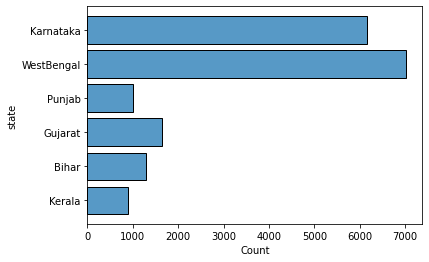

In [65]:
sns.histplot(data=df,y=df['state'],shrink=.8)

-	Over 73% of the customers in the relevant data set belong to two states of West Bengal & Karnataka

<a name = Section19></a>
### **Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).**

In [66]:

PhBrds = df['phone_brand'].value_counts().nlargest(10).index[:]
UsrPhn = df[df['phone_brand'].isin(PhBrds)]
UsrPhn['phone_brand'].value_counts()

#resultSeries= df.groupby('phone_brand')['device_id'].count().nlargest(10)
#ph_br_T10 = resultSeries.to_frame();
#ph_br_T10 ['phone_brand'] = ph_br_T10.index
#ph_br_T10 .head(10)

Xiaomi     4491
Samsung    3902
Huawei     3145
vivo       1585
OPPO       1321
Meizu      1151
Coolpad     794
HTC         281
Lenovo      209
LeEco       162
Name: phone_brand, dtype: int64

<AxesSubplot:>

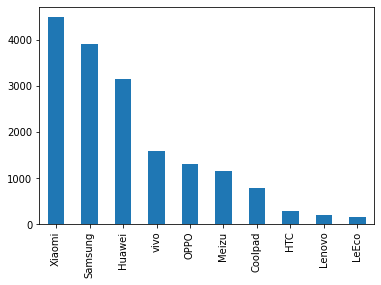

In [67]:
df["phone_brand"].value_counts()[0:10].plot.bar()

- The most popular Phone Brand is Xiaomi followed by Samsung

<a name = Section20></a>
### **Distribution of Users across Gender**

<AxesSubplot:>

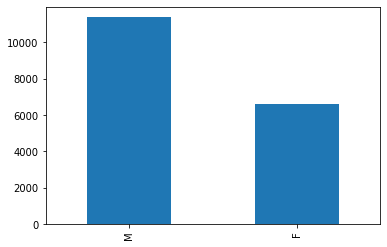

In [68]:
df["gender"].value_counts().plot.bar()


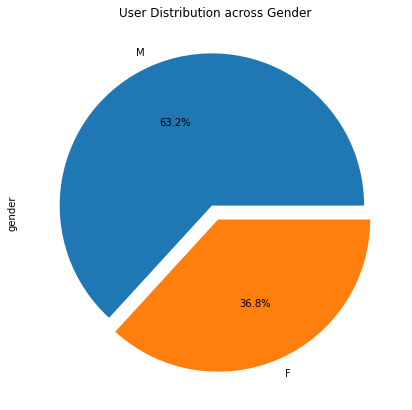

In [69]:
#df["gender"].value_counts().plot.pie()
plt.figure(figsize=(15,7))

exp = (0.05, 0.05)
df["gender"].value_counts().plot.pie(title = "User Distribution across Gender", autopct="%.1f%%",explode = exp)

plt.show()

-	The gender distribution (Male/Female) is distinctly in favour of Males by 26%

<a name = Section21></a>
### **Distribution of Users across Age Segments**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(20, 30]'),
  Text(1, 0, '(30, 40]'),
  Text(2, 0, '(40, 50]'),
  Text(3, 0, '(10, 20]'),
  Text(4, 0, '(50, 60]'),
  Text(5, 0, '(0, 10]'),
  Text(6, 0, '(60, 70]'),
  Text(7, 0, '(70, 80]'),
  Text(8, 0, '(80, 90]'),
  Text(9, 0, '(90, 100]')])

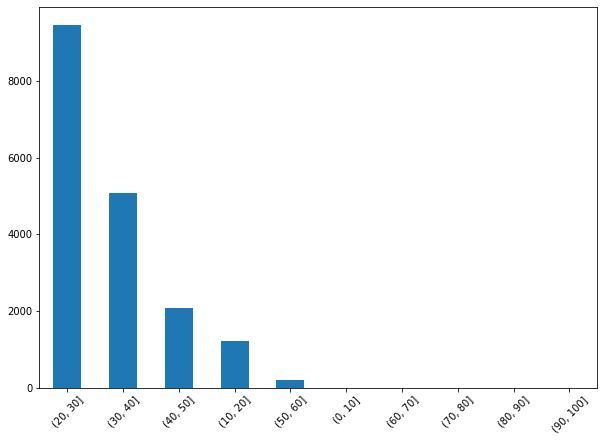

In [70]:
plt.figure(figsize=(10,7))
df["new_group"].value_counts().plot.bar()
plt.xticks(rotation=45)

In [71]:
df["new_group"].value_counts()


(20, 30]     9458
(30, 40]     5074
(40, 50]     2083
(10, 20]     1213
(50, 60]      198
(0, 10]         0
(60, 70]        0
(70, 80]        0
(80, 90]        0
(90, 100]       0
Name: new_group, dtype: int64

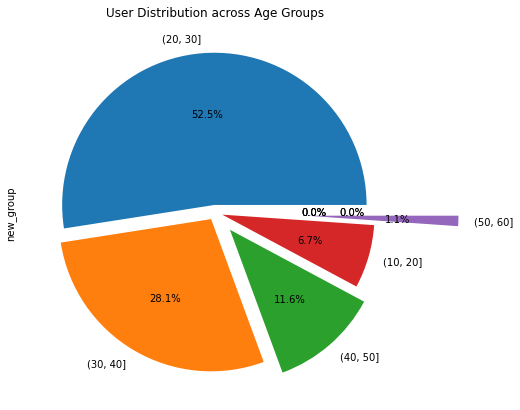

In [72]:
plt.figure(figsize=(15,7))
#df["new_group"].value_counts().plot.pie()
exp = (0.05, 0.05, 0.15, 0.05, 0.6,0.3,0.3, 0.05, 0.05, 0.05)
df["new_group"].value_counts().plot.pie(title = "User Distribution across Age Groups", autopct="%.1f%%",explode = exp)

plt.show()

-	Over 80% of customers belong to age group 20-40 years with over 52% belonging to 20-30 age group. This number increases to 87% for 18-40 year group

<AxesSubplot:xlabel='age', ylabel='Density'>

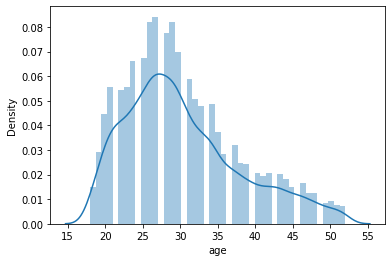

In [73]:
sns.distplot(filt_states['age'])

-	The age data despite having been corrected for outliers, is seen to be right skewed

<a name = Section22></a>
### **Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender**

<Figure size 2160x720 with 0 Axes>

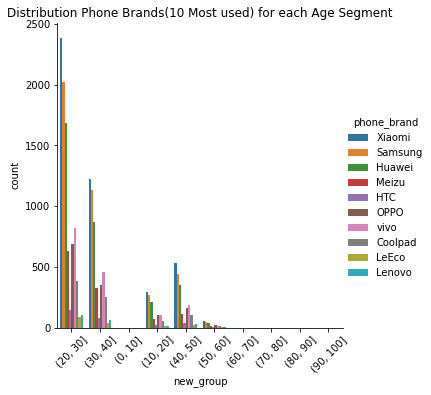

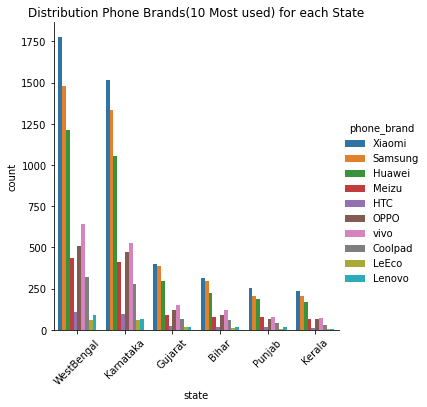

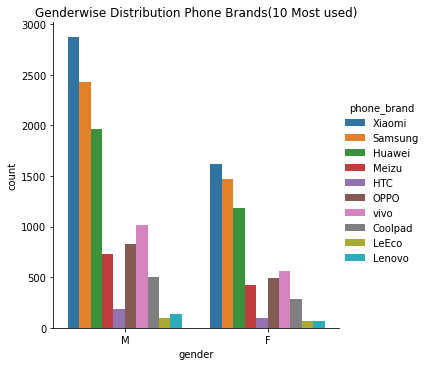

In [74]:

PhBrds = df['phone_brand'].value_counts().nlargest(10).index[:]
fig = plt.figure(figsize =(30,10))
chk = df[df['phone_brand'].isin(PhBrds)]
sns.catplot(data=chk,kind= 'count',x='new_group',hue='phone_brand',order = chk['new_group'][0:4].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution Phone Brands(10 Most used) for each Age Segment")
sns.catplot(data=chk,kind= 'count',x='state',hue='phone_brand',order = chk['state'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution Phone Brands(10 Most used) for each State")
ax = sns.catplot(data=chk,kind= 'count',x='gender',hue='phone_brand',order = chk['gender'].value_counts().index)
plt.title("Genderwise Distribution Phone Brands(10 Most used)")
plt.show()

-	Customers showed distinct preference for Xiaomi followed by Samsung across age groups. The customer preferences did not change across the groups
-	The phone_brand preferences across the states remain the same
-	There was no change noticed in the phone brand preference across the genders. Xiaomi followed by Samsung and the other eight considered

 <a name = Section23></a>
 ### **Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands)**

<Figure size 1080x504 with 0 Axes>

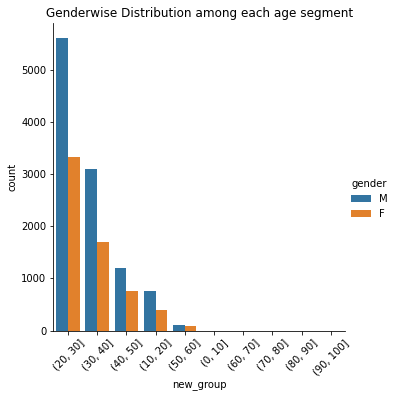

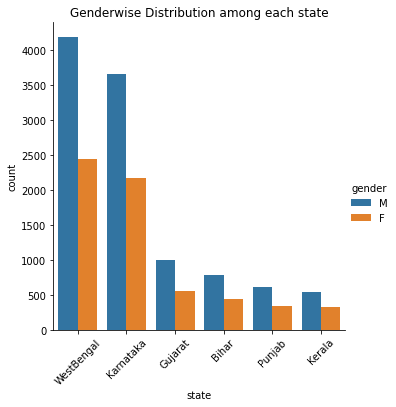

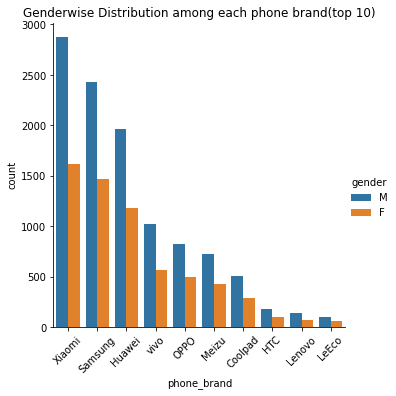

In [75]:
fig = plt.figure(figsize =(15,7))
chk = df[df['phone_brand'].isin(PhBrds)]
sns.catplot(data=chk,kind='count',x='new_group',hue='gender', order = chk['new_group'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Genderwise Distribution among each age segment")
sns.catplot(data=chk,kind='count',x='state',hue='gender', order = chk['state'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Genderwise Distribution among each state")
sns.catplot(data=chk,kind='count',x='phone_brand',hue='gender',order = chk['phone_brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Genderwise Distribution among each phone brand(top 10)")
plt.show() 

-	Across the age segments the gender gap remains but reduces imperceptibly as age increases
-	The gender gap continues to be seen and male subscribers distinctly outnumber the female subscribers
-	Phone_brand preferences remain same irrespective of the gender. So Gender has no impact on phone_brand preferences

<a name = Section24></a>
### **Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands)**

<Figure size 2880x504 with 0 Axes>

<Figure size 2880x504 with 0 Axes>

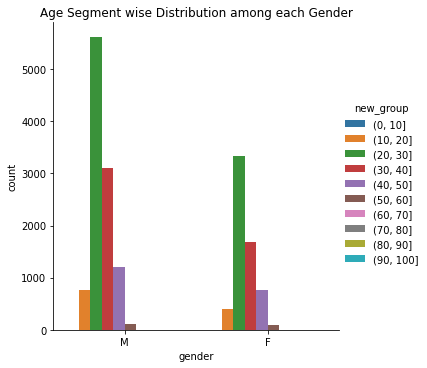

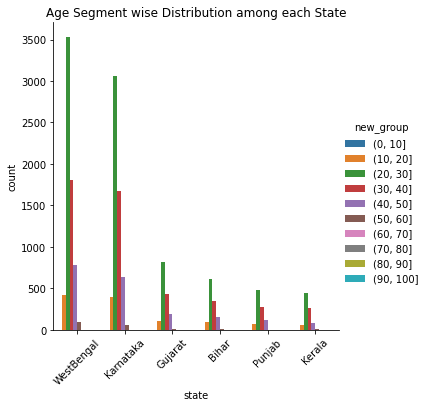

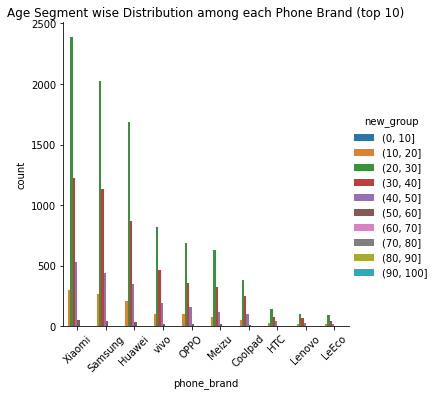

In [76]:
fig = plt.figure(figsize =(40,7))
PhBrds = df['phone_brand'].value_counts().nlargest(10).index[:]
fig = plt.figure(figsize =(40,7))
chk = df[df['phone_brand'].isin(PhBrds)]
sns.catplot(data=chk,kind='count',x='gender',hue='new_group',order = chk['gender'].value_counts().index)
plt.title("Age Segment wise Distribution among each Gender")
sns.catplot(data=chk,kind='count',x='state',hue='new_group',order = chk['state'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Age Segment wise Distribution among each State")
sns.catplot(data=chk,kind='count',x='phone_brand',hue='new_group',order = chk['phone_brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Age Segment wise Distribution among each Phone Brand (top 10)")
plt.show() 

-	Age segment wise distribution when viewed from gender perspective indicates maximum number of users in range 20-30 years followed by 30-40 age group
-	No significant change in distribution observed across the states
-   The top ten brand preferences remain same for the differing age segments across the sample set

<a name = Section25></a>
### **Hourly distribution of Phone Calls**

In [77]:
import datetime as dt

list1 = ['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']
#PhHrdist = PhHrdist[PhHrdist['state'].isin(list1)]
PhHrdist = events[events['state'].isin(list1)]
#Extracting Hour data from timestamp
PhHrdist['Hour'] = PhHrdist['timestamp'].dt.hour

#Extracting Month data from timestamp and mapping it to list monthmap
monthmap={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep",10:"Oct", 11:"Nov", 12:"Dec"}
PhHrdist['Month'] = PhHrdist['timestamp'].dt.month
PhHrdist["Month"]=PhHrdist["Month"].map(monthmap)

#Extracting Day of Week data from timestamp and mapping it to list weekmap
weekmap={0:"Mon", 1:"Tue", 2:"Wed", 3:"Thur", 4:"Fri", 5:"Sat", 6:"Sun"}
PhHrdist["Day of Week"] = (PhHrdist['timestamp'].dt.dayofweek) + 1
PhHrdist["Day of Week"]=PhHrdist["Day of Week"].map(weekmap)

PhHrdist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422923 entries, 1 to 3252921
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   event_id     422923 non-null  int64         
 1   device_id    422923 non-null  int64         
 2   timestamp    422923 non-null  datetime64[ns]
 3   longitude    422923 non-null  float64       
 4   latitude     422923 non-null  float64       
 5   city         422923 non-null  object        
 6   state        422923 non-null  object        
 7   Hour         422923 non-null  int64         
 8   Month        422923 non-null  object        
 9   Day of Week  362826 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 35.5+ MB


<Figure size 1440x504 with 0 Axes>

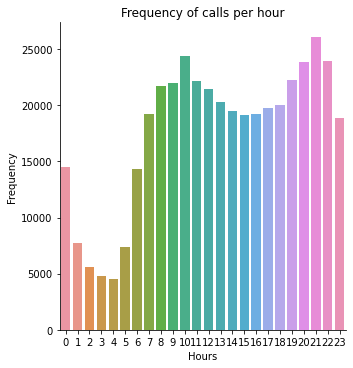

In [78]:
 #Hourly distribution of calls
fig = plt.figure(figsize =(20,7))

sns.catplot(data=PhHrdist,kind= 'count',x='Hour')

plt.xlabel('Hours') 
plt.ylabel('Frequency') 
plt.title('Frequency of calls per hour')
plt.show()

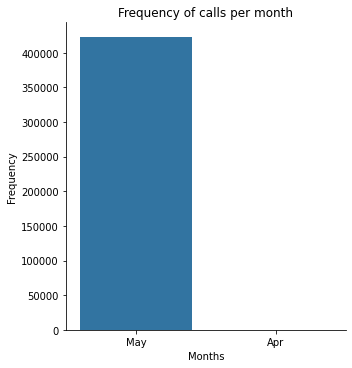

In [79]:
#Frequency of calls per month
# fig = plt.figure(figsize =(15,7))

sns.catplot(data=PhHrdist,kind= 'count',x='Month')
plt.xlabel('Months') 
plt.ylabel('Frequency') 
plt.title('Frequency of calls per month')
plt.show()

-	The frequency of calls were maximum between 0800 to 2200 hrs peaking at 1000 and 2100 hrs. Significant number of calls have been observed around midnight 0000 hrs
-	The week wise summary appears to be erroneous as no calls seem to have been made on Monday with almost 60,000 plus calls having been made every day of the week except on Monday
-	The month wise summary indicates that all the calls in the data set were made in the months of April and May with most calls having been made in May

<a name = Section26></a>
# **Summarization**

-	The telecom company must focus on expanding its presence beyond the cities of Bengaluru and Kolkata and focus on Tier II and Tier III cities across the target states

-	The highest number of subscribers present in Kolkata and Bengaluru cities could also be an indication of the poor tower coverage in other cities of the target states. This needs to be further evaluated

-	The gender disparity needs to be addressed through suitable product design accompanied by a focussed marketing  effort targeting females

-	As a  part of co-branding effort, Xiaomi and Samsung may be approached as these are preferred brands across genders and age groups as well as across states

-	The targeting of age groups above 40 years must be a focussed area of expansion as the customer base in these regions is relatively low

-	The low utilisation of available capacity between 0100 hrs to 0800 hrs may  be increased using appropriated marketing tools such as offers of free internet during this period



<a name = Section27></a>
## **Conclusion**

- This project was undertaken by the Capstone_1014 team to provide actionable insights for INSAID Telecom as per the data provided

- The same was evaluated using EDA and statistical approach and some proposed solutions have been suggested

- It is also highlighted that the data collection practices of INSAID telecom needs to be improved, to avoid data imbalance and to gain insights for better analysis and identifying business improvement opportunities


<a name = Section28></a>
## **Actionable Insights**



- 	The telecom company must focus on expanding its presence beyond the cities of Bengaluru and Kolkata and focus on Tier II and Tier III cities across the target states

- 	The highest number of subscribers present in Kolkata and Bengaluru cities could also be an indication of the poor tower coverage in other cities of the target states. This needs to be further evaluated


-	The gender disparity needs to be addressed through suitable product design accompanied by a focussed marketing  effort targeting females

-   As a  part of co-branding effort, Xiaomi and Samsung may be approached as these are preferred brands across genders and age groups as well as across states

-	The targeting of age groups above 40 years must be a focussed area of expansion as the customer base in these regions is relatively low

-	The low utilisation of available capacity between 0100 hrs to 0800 hrs may  be increased using appropriated marketing tools such as offers of free internet during this period



Thank You For Your Time 